In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from scipy.stats import normaltest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
import seaborn as sns

### Business Understanding
The dataset has been downloaded from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/HTRU2). The dataset has 9 continuous features and a binary target variable indicating whether pulsar was detected or not.

Aim of the study is to build a model that given 8 feature values, predict whether the detected object is a pulsar star or not. But first, an understanding of the dataset is necessary.

In [2]:
pulsar_detection_data = pd.read_csv('pulsar_stars.csv')

### Data Understanding

In [3]:
pulsar_detection_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# Check for positive and negative cases of pulsar detection
pulsar_detection_data['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [5]:
# types of features
pulsar_detection_data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [6]:
# check null values
pulsar_detection_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [8]:
pulsar_detection_data[pulsar_detection_data['target_class']==1].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


In [9]:
pulsar_detection_data[pulsar_detection_data['target_class']==0].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.0
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


**Q-1: Analysing distribution of each feature with and without pulsar. Are these distributions significantly different?**

Making a boxplot helps in identifying spread of the distribution, here I am comparing spread for each
feature when pulsar was detected vs. when pulsar was not detected.
This helps in identifying which features are obvious candidates for identifying pulsar.

In [35]:
def freq_distributions_plotter(feature):
    '''
    Plotting Visuals of each feature with target variable
    Input: string - One of the feature in dataset
    Outputs: A visual
    '''
    feature = ' ' + feature
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
#     ax[0].set_xlabel(feature)
#     ax[1].set_xlabel(feature)
#     pulsar_detection_data[pulsar_detection_data['target_class']==1][feature].reset_index(drop=True).plot(ax=ax[0], title='Pulsar', kind='box')
#     pulsar_detection_data[pulsar_detection_data['target_class']==0][feature].plot(ax=ax[1], title='No Pulsar', kind='box');
    ax = sns.boxplot(pulsar_detection_data['target_class'], pulsar_detection_data[feature])
    ax.set_xticklabels(['Pulsar', 'No Pulsar'])


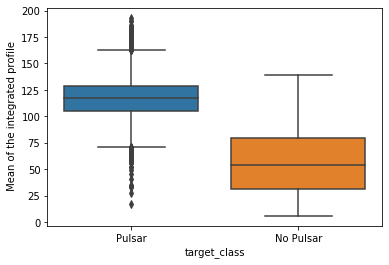

In [36]:
freq_distributions_plotter('Mean of the integrated profile')

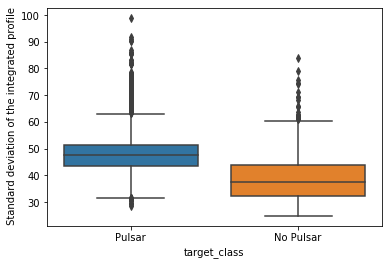

In [37]:
freq_distributions_plotter('Standard deviation of the integrated profile')

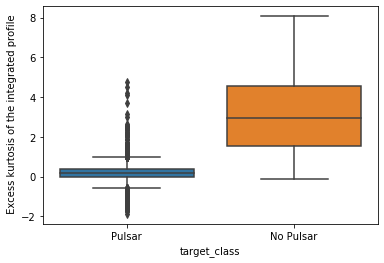

In [38]:
freq_distributions_plotter('Excess kurtosis of the integrated profile')

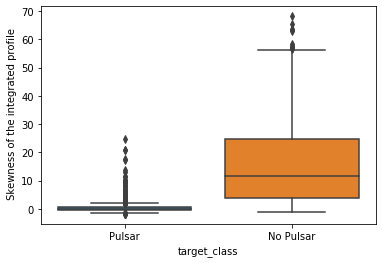

In [39]:
freq_distributions_plotter('Skewness of the integrated profile')

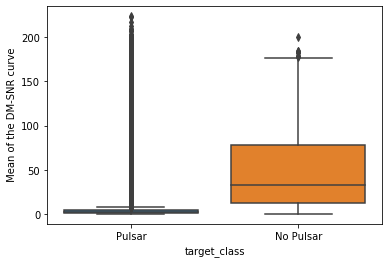

In [40]:
freq_distributions_plotter('Mean of the DM-SNR curve')

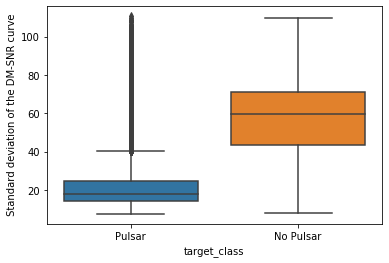

In [41]:
freq_distributions_plotter('Standard deviation of the DM-SNR curve')

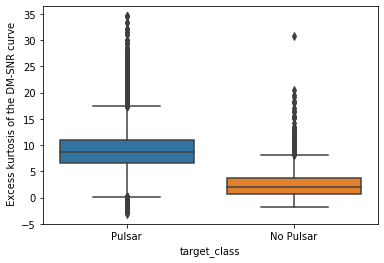

In [42]:
freq_distributions_plotter('Excess kurtosis of the DM-SNR curve')

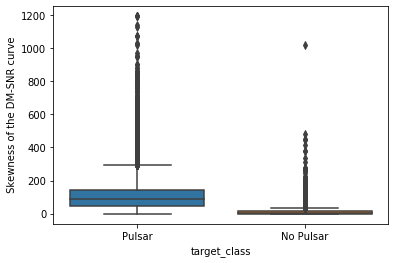

In [43]:
freq_distributions_plotter('Skewness of the DM-SNR curve')

In [21]:
# The most significant are:
# Mean and skewness of itegrated profile.
# Mean, standard deviation and excess kurtosis 

# But there are outliers that lie in other distribution's 75% values, hence any one feature isn't enough
# for identification of pulsar. But together they can give a very conclusive result

**Q-2: Are the features that will be used to predict the pulsar correlated?**

This is a necessary check since this could cause multi-collinearity problem, some models are sensitive to multi-collinearity. It can also help in feature selection when 2 features are strongly correlated, only 1 feature is enough for model building.

In [22]:
# Considering high correlation as greater than 0.7 or less than -0.7
pulsar_detection_data.corr()[(pulsar_detection_data.corr() > 0.7) | (pulsar_detection_data.corr() < -0.7)]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,NaN,-0.873898,-0.738775,NaN,NaN,NaN,NaN,NaN
Standard deviation of the integrated profile,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess kurtosis of the integrated profile,-0.873898,NaN,1.000000,0.945729,NaN,NaN,NaN,NaN,0.791591
Skewness of the integrated profile,-0.738775,NaN,0.945729,1.000000,NaN,NaN,NaN,NaN,0.709528
Mean of the DM-SNR curve,NaN,NaN,NaN,NaN,1.000000,0.796555,NaN,NaN,NaN
Standard deviation of the DM-SNR curve,NaN,NaN,NaN,NaN,0.796555,1.000000,-0.809786,NaN,NaN
Excess kurtosis of the DM-SNR curve,NaN,NaN,NaN,NaN,NaN,-0.809786,1.000000,0.923743,NaN
Skewness of the DM-SNR curve,NaN,NaN,NaN,NaN,NaN,NaN,0.923743,1.000000,NaN
target_class,NaN,NaN,0.791591,0.709528,NaN,NaN,NaN,NaN,1.000000


(8, 0.5)

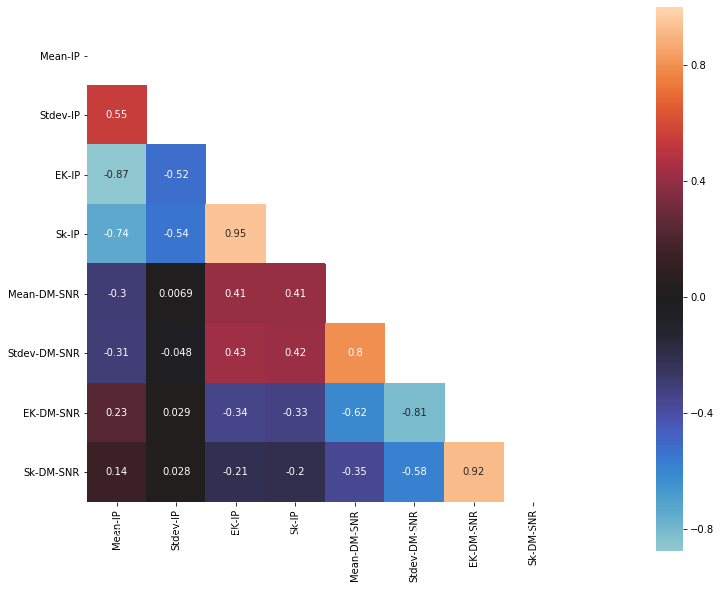

In [80]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(pulsar_detection_data.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(pulsar_detection_data.corr(), mask=mask, square=True, center=0, annot=True, xticklabels=['Mean-IP', 'Stdev-IP', 'EK-IP', 'Sk-IP', 'Mean-DM-SNR',
                                                                   'Stdev-DM-SNR', 'EK-DM-SNR', 'Sk-DM-SNR'],
           yticklabels=['Mean-IP', 'Stdev-IP', 'EK-IP', 'Sk-IP', 'Mean-DM-SNR', 'Stdev-DM-SNR','EK-DM-SNR', 'Sk-DM-SNR']);
ax.set_ylim(8)

In [22]:
# Yes some of the features are highly correlated so can't use models with multi-collinearity problem

**Q-3: Are the features normally distributed?**

In [24]:
# Null hypothesis : Distribution is normal
# If p-value < 0.01, can reject the null hypothesis
print(normaltest(pulsar_detection_data[' Mean of the integrated profile']))
print(normaltest(pulsar_detection_data[' Standard deviation of the integrated profile']))
print(normaltest(pulsar_detection_data[' Excess kurtosis of the integrated profile']))
print(normaltest(pulsar_detection_data[' Skewness of the integrated profile']))


print(normaltest(pulsar_detection_data[' Mean of the DM-SNR curve']))
print(normaltest(pulsar_detection_data[' Standard deviation of the DM-SNR curve']))
print(normaltest(pulsar_detection_data[' Excess kurtosis of the DM-SNR curve']))
print(normaltest(pulsar_detection_data[' Skewness of the DM-SNR curve']))

NormaltestResult(statistic=4580.667790905046, pvalue=0.0)
NormaltestResult(statistic=730.4769612928392, pvalue=2.3930031843850363e-159)
NormaltestResult(statistic=13434.267033635784, pvalue=0.0)
NormaltestResult(statistic=18007.21177152432, pvalue=0.0)
NormaltestResult(statistic=13467.287164275938, pvalue=0.0)
NormaltestResult(statistic=6152.602710850444, pvalue=0.0)
NormaltestResult(statistic=1136.6980859907671, pvalue=1.4762055443103622e-247)
NormaltestResult(statistic=11017.525888588696, pvalue=0.0)


In [25]:
# There goes our hopes for using naive bayes classifier, none of the features are normally distributed since
# all p-values are less than 0.01, rejecting the null hypothesis that the distributions are normal

### Preparing Data, Data Modeling & Evaluation

In [55]:
def model_evaluation(y_test, y_pred):
    '''
    Evaluate model using different metrics
    
    Input:
    y_test - An array of actual test labels
    y_pred - An array of predicted test labels
    
    Returns: confusion matrix, accuracy, precision, recall and f1 score
    '''
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('True positives: ', tp)
    print('True negatives: ', tn)
    print('False positives: ', fp)
    print('False negatives: ', fn)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("f1_score: ", f1_score(y_test, y_pred))
#     print("fbeta with beta of 0.5: ", fbeta_score(y_test, y_pred, beta=0.5))


In [136]:
# Random Forest classifier

# Stratified Splitting
X = pulsar_detection_data.drop(['target_class'
#                                , ' Excess kurtosis of the integrated profile'
#                                ,' Skewness of the integrated profile'
#                                , ' Excess kurtosis of the DM-SNR curve'
#                                ,' Skewness of the DM-SNR curve'
#                                , ' Standard deviation of the integrated profile'
#                                ,' Standard deviation of the DM-SNR curve'
                               ], axis=1)
y = pulsar_detection_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Original Data: ", pulsar_detection_data.shape)
print("Train features: ", X_train.shape)
print(y_train.value_counts())
print("Test features: ", X_test.shape)
print(y_test.value_counts())

# preserving column names since scaling outputs numpy array
columns = X_train.columns

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# renaming columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = columns
X_test.columns = columns

# model building
model = RandomForestClassifier(n_estimators=100, random_state=1,bootstrap=True, class_weight='balanced',
                               criterion='gini', max_depth=None, 
                               max_features='log2',max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, min_samples_leaf=2, min_samples_split=3,
                               min_weight_fraction_leaf=0.0, n_jobs=None, oob_score=False,
                               verbose=0, warm_start=False)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


print("")

print("Train Set Evaluation:")
print(model_evaluation(y_train, y_pred_train))

print("Test Set Evaluation:")
print(model_evaluation(y_test, y_pred_test))
print("")

Original Data:  (17898, 9)
Train features:  (12528, 8)
0    11381
1     1147
Name: target_class, dtype: int64
Test features:  (5370, 8)
0    4878
1     492
Name: target_class, dtype: int64

Train Set Evaluation:
True positives:  1146
True negatives:  11337
False positives:  44
False negatives:  1
Accuracy:  0.9964080459770115
Precision:  0.9630252100840336
Recall:  0.999128160418483
f1_score:  0.9807445442875482
None
Test Set Evaluation:
True positives:  425
True negatives:  4837
False positives:  41
False negatives:  67
Accuracy:  0.9798882681564246
Precision:  0.9120171673819742
Recall:  0.8638211382113821
f1_score:  0.8872651356993737
None



In [122]:
# KNN classifier

# Stratified Splitting
X = pulsar_detection_data.drop('target_class', axis=1)
y = pulsar_detection_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Original Data: ", pulsar_detection_data.shape)
print("Train features: ", X_train.shape)
print(y_train.value_counts())
print("Test features: ", X_test.shape)
print(y_test.value_counts())

# preserving column names since scaling outputs numpy array
columns = X_train.columns

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# renaming columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = columns
X_test.columns = columns

# model building
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("")
print("Test Set Evaluation:")
print(model_evaluation(y_test, y_pred_test))
print("")
print("Train Set Evaluation:")
print(model_evaluation(y_train, y_pred_train))

Original Data:  (17898, 9)
Train features:  (12528, 8)
0    11381
1     1147
Name: target_class, dtype: int64
Test features:  (5370, 8)
0    4878
1     492
Name: target_class, dtype: int64

Test Set Evaluation:
True positives:  410
True negatives:  4852
False positives:  26
False negatives:  82
Accuracy:  0.9798882681564246
Precision:  0.9403669724770642
Recall:  0.8333333333333334
f1_score:  0.8836206896551725
None

Train Set Evaluation:
True positives:  985
True negatives:  11317
False positives:  64
False negatives:  162
Accuracy:  0.9819604086845466
Precision:  0.9389895138226882
Recall:  0.8587619877942458
f1_score:  0.8970856102003644
None


In [124]:
# Multilayer perceptron

# Stratified Splitting
X = pulsar_detection_data.drop('target_class', axis=1)
y = pulsar_detection_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Original Data: ", pulsar_detection_data.shape)
print("Train features: ", X_train.shape)
print(y_train.value_counts())
print("Test features: ", X_test.shape)
print(y_test.value_counts())

# preserving column names since scaling outputs numpy array
columns = X_train.columns

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# renaming columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = columns
X_test.columns = columns

model = MLPClassifier(hidden_layer_sizes=100, activation='relu', learning_rate='adaptive', random_state=1)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("")
print("Test Set Evaluation:")
print(model_evaluation(y_test, y_pred_test))
print("")
print("Train Set Evaluation:")
print(model_evaluation(y_train, y_pred_train))

Original Data:  (17898, 9)
Train features:  (12528, 8)
0    11381
1     1147
Name: target_class, dtype: int64
Test features:  (5370, 8)
0    4878
1     492
Name: target_class, dtype: int64

Test Set Evaluation:
True positives:  413
True negatives:  4847
False positives:  31
False negatives:  79
Accuracy:  0.9795158286778398
Precision:  0.9301801801801802
Recall:  0.8394308943089431
f1_score:  0.8824786324786325
None

Train Set Evaluation:
True positives:  983
True negatives:  11309
False positives:  72
False negatives:  164
Accuracy:  0.981162196679438
Precision:  0.9317535545023696
Recall:  0.8570183086312119
f1_score:  0.8928247048138056
None


In [126]:
# SGD classifier

# Stratified Splitting
X = pulsar_detection_data.drop('target_class', axis=1)
y = pulsar_detection_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Original Data: ", pulsar_detection_data.shape)
print("Train features: ", X_train.shape)
print(y_train.value_counts())
print("Test features: ", X_test.shape)
print(y_test.value_counts())

# preserving column names since scaling outputs numpy array
columns = X_train.columns

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# renaming columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = columns
X_test.columns = columns

model = SGDClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("")
print("Test Set Evaluation:")
print(model_evaluation(y_test, y_pred_test))
print("")
print("Train Set Evaluation:")
print(model_evaluation(y_train, y_pred_train))

Original Data:  (17898, 9)
Train features:  (12528, 8)
0    11381
1     1147
Name: target_class, dtype: int64
Test features:  (5370, 8)
0    4878
1     492
Name: target_class, dtype: int64

Test Set Evaluation:
True positives:  383
True negatives:  4861
False positives:  17
False negatives:  109
Accuracy:  0.976536312849162
Precision:  0.9575
Recall:  0.7784552845528455
f1_score:  0.8587443946188341
None

Train Set Evaluation:
True positives:  895
True negatives:  11332
False positives:  49
False negatives:  252
Accuracy:  0.9759738186462324
Precision:  0.948093220338983
Recall:  0.7802964254577158
f1_score:  0.856049736967958
None


In [133]:
# Voting classifier

# Stratified Splitting
X = pulsar_detection_data.drop('target_class', axis=1)
y = pulsar_detection_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Original Data: ", pulsar_detection_data.shape)
print("Train features: ", X_train.shape)
print(y_train.value_counts())
print("Test features: ", X_test.shape)
print(y_test.value_counts())

# preserving column names since scaling outputs numpy array
columns = X_train.columns

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# renaming columns
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = columns
X_test.columns = columns

clf1 = LogisticRegression(solver='lbfgs', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = KNeighborsClassifier()
# clf4 = GradientBoostingClassifier(random_state=1)
# clf5 = SVC(probability=True, random_state=1)

model = VotingClassifier(estimators=[
    ('lr', clf1), 
    ('rf1', clf2), 
    ('knn', clf3),
#     ('gbc', clf4),
#     ('svc', clf5)
],
    voting='soft', weights=[1, 5, 1])



model.fit(X_train,y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("")
print("Test Set Evaluation:")
print(model_evaluation(y_test, y_pred_test))
print("")
print("Train Set Evaluation:")
print(model_evaluation(y_train, y_pred_train))

Original Data:  (17898, 9)
Train features:  (12528, 8)
0    11381
1     1147
Name: target_class, dtype: int64
Test features:  (5370, 8)
0    4878
1     492
Name: target_class, dtype: int64

Test Set Evaluation:
True positives:  416
True negatives:  4850
False positives:  28
False negatives:  76
Accuracy:  0.9806331471135941
Precision:  0.9369369369369369
Recall:  0.8455284552845529
f1_score:  0.888888888888889
None

Train Set Evaluation:
True positives:  1098
True negatives:  11373
False positives:  8
False negatives:  49
Accuracy:  0.9954501915708812
Precision:  0.9927667269439421
Recall:  0.9572798605056669
f1_score:  0.9747003994673769
None


In [76]:
# # predict class probabilities for all classifiers
# # Voting classifier

# X = pulsar_detection_data.drop('target_class', axis=1)
# y = pulsar_detection_data['target_class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# scaler = StandardScaler()
# columns = X_train.columns
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
# X_train.columns = columns
# X_test.columns = columns


# # clf1 = LogisticRegression(solver='lbfgs', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf3 = KNeighborsClassifier(n_neighbors=10)
# # clf4 = GradientBoostingClassifier(random_state=1)
# # clf5 = SVC(probability=True)

# model = VotingClassifier(estimators=[('rf', clf2), ('knn', clf3)], voting='soft')

# probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (clf2, clf3, model)]

# # get class probabilities for the first sample in the dataset
# class1_1 = [pr[0, 0] for pr in probas]
# class2_1 = [pr[0, 1] for pr in probas]


# # plotting

# N = 3  # number of groups
# ind = np.arange(N)  # group positions
# width = 0.35  # bar width

# fig, ax = plt.subplots(figsize=(15, 10))

# # bars for classifier 1-3
# p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green', edgecolor='k')
# p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen', edgecolor='k')


# # bars for VotingClassifier
# p3 = ax.bar(ind, [0, 0, class1_1[-1]], width, color='blue', edgecolor='k')
# p4 = ax.bar(ind + width, [0, 0, class2_1[-1]], width, color='steelblue', edgecolor='k')


# # plot annotations
# plt.axvline(1.8, color='k', linestyle='dashed')
# ax.set_xticks(ind + width)
# ax.set_xticklabels([
# #     'LogisticRegression\nweight 3',
#                     'RandomForestClassifier\nweight 1',
#                     'KNeighborsClassifier\nweight 1',
# #                     'GradientBoostingClassifier\nweight 1',
# #                     'SVC\nweight 1',
#                     'VotingClassifier\n(average probabilities)'],
#                    rotation=40,
#                    ha='right')
# plt.ylim([0, 1])
# plt.title('Class probabilities for sample 1 by different classifiers')

# plt.legend([p1[0], p2[0]], ['Pulsar', 'class 2'], loc='upper left')
# plt.tight_layout()
# plt.show()

**GRID SEARCH**

In [74]:
parameters = {
    'n_estimators': [50, 100], 
    'criterion':['gini', 'entropy'], 
    'max_depth':[None, 1, 3], 
    'min_samples_split':[2, 3], 
    'min_samples_leaf':[1, 2], 
#     'min_weight_fraction_leaf':0.0, 
    'max_features':['auto', 'sqrt', 'log2', None], 
#     'max_leaf_nodes':None, 
#     'min_impurity_decrease':0.0, 
#     'oob_score':[False, True], 
    'class_weight':[None, 'balanced', 'balanced_subsample']
}

In [75]:
model_tuned = GridSearchCV(RandomForestClassifier(), parameters, cv=3)
model_tuned.fit(X_train,y_train)
y_pred_tuned = model_tuned.predict(X_test)

In [78]:
model_evaluation(y_train, model_tuned.predict(X_train))

True positives:  1143
True negatives:  11342
False positives:  39
False negatives:  4
Accuracy:  0.9965676883780332
Precision:  0.9670050761421319
Recall:  0.9965126416739319
f1_score:  0.9815371404036067


In [79]:
model_tuned.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)